In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# checking for imported file in the directory

os.listdir('.')

['.config', 'Online Retail.xlsx', 'sample_data']

In [ ]:
# Reading file with pandas

ret = pd.read_excel('Online Retail.xlsx')
ret.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# Creating a copy of the dataframe

r = ret.copy()
r.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Checking for duplicates

duplicates = r.duplicated().sum()
duplicates

5268

### Handling duplicates and Null values

In [ ]:
# Removing duplicates

r = r.drop_duplicates()

In [ ]:
# Checking the sum of all Null CustomerIDs

r.CustomerID.isna().sum()

135037

In [ ]:
# Checking for Null and infinity values

mask = np.isinf(r.CustomerID) | np.isnan(r.CustomerID)
r.loc[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
# Replacing infinity and empty rows with zero for easier removal

r.CustomerID = r['CustomerID'].fillna(0).replace(float('inf'), 0)

In [ ]:
# Converting to integer

r.CustomerID = r.CustomerID.astype(int)

In [ ]:
r.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,11435.904653
std,219.130156,97.233118,6795.044250
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,0.000000
50%,3.000000,2.080000,14336.000000
75%,10.000000,4.130000,16241.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
r.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Checking for rows with zero CustomerID

r[r['CustomerID']<1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,0,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,0,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,0,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,0,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,0,United Kingdom


In [ ]:
# Removing rows with zero CustomerID

r.drop(r[r['CustomerID']<1].index, inplace=True)

In [ ]:
# Checking for rows with zero Quantity

r[r.Quantity < 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [ ]:
# Removing rows with zero Quantity

r.drop(r[r.Quantity < 1].index, inplace=True)

In [ ]:
# Checking for rows with zero UnitPrice

r[r.UnitPrice < 0.0001]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


In [ ]:
# Removing rows with zero UnitPrice, since the minimum is 0.0001

r.drop(r[r.UnitPrice < 0.0001].index, inplace=True)

In [ ]:
r.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
# Checking for distinct CustomerID

r.CustomerID.unique()

array([17850, 13047, 12583, ..., 13298, 14569, 12713])

In [ ]:
# Converting the CustomerID column

r.CustomerID = r['CustomerID'].astype(str)

In [ ]:
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43248 entries, 26 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    43248 non-null  object        
 1   StockCode    43248 non-null  object        
 2   Description  43248 non-null  object        
 3   Quantity     43248 non-null  int64         
 4   InvoiceDate  43248 non-null  datetime64[ns]
 5   UnitPrice    43248 non-null  float64       
 6   CustomerID   43248 non-null  object        
 7   Country      43248 non-null  object        
 8   Revenue      43248 non-null  float64       
 9   Year         43248 non-null  datetime64[ns]
 10  Month        43248 non-null  object        
 11  Profit       43248 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# To show distinct values in the Country column

r.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
# To show number of Countries

r.Country.nunique()

35

In [ ]:
# Checking for unspecified countries

r[r.Country == 'Unspecified']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified
...,...,...,...,...,...,...,...,...
308810,564051,23007,SPACEBOY BABY GIFT SET,1,2011-08-22 13:32:00,16.95,14265,Unspecified
308811,564051,21833,CAMOUFLAGE LED TORCH,12,2011-08-22 13:32:00,1.69,14265,Unspecified
308812,564051,23081,GREEN METAL BOX ARMY SUPPLIES,2,2011-08-22 13:32:00,8.25,14265,Unspecified
308813,564051,23046,PAPER LANTERN 9 POINT DELUXE STAR,2,2011-08-22 13:32:00,6.65,14265,Unspecified


In [ ]:
# Removing rows with unspecified countries

r.drop(r[r.Country == 'Unspecified'].index, inplace=True)

In [ ]:
# To create a new column for 'Revenue' by multiplying the Quantity and Price

r['Revenue'] = r.Quantity * r.UnitPrice
r.Revenue

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Revenue, Length: 392451, dtype: float64

In [ ]:
# To create a new column for 'Profit' by Subtracting the Price from Revenue

r['Profit'] = r.Revenue - r.UnitPrice
r.Profit

26        86.25
27        86.25
28        41.25
29         9.35
30        14.95
          ...  
541904     9.35
541905    10.50
541906    12.45
541907    12.45
541908     9.90
Name: Profit, Length: 43248, dtype: float64

In [ ]:
# Creating a Year and Month column 

r['Year'] = pd.DatetimeIndex(r['InvoiceDate']).year
r['Month'] = r['InvoiceDate'].dt.strftime('%B')
r

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,December


In [ ]:
# Checking their data types

r[['Year', 'Month']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392451 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Year    392451 non-null  int64 
 1   Month   392451 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.0+ MB


In [ ]:
# Converting the Year column to date

r.Year = pd.to_datetime(r['Year'])


In [ ]:
r[['Year', 'Month']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392451 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Year    392451 non-null  datetime64[ns]
 1   Month   392451 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 9.0+ MB


### Removing UK because it is not needed for the analysis


In [ ]:
# Dropping UK from the Country column

r.drop(r[r.Country == 'United Kingdom'].index, inplace=True)

In [ ]:
# Checking for UK

r[r.Country == 'United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month


In [ ]:
r.Country.unique()

array(['France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE',
       'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark',
       'Cyprus', 'Sweden', 'Finland', 'Austria', 'Greece', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Israel', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
# To show number of entries for each Country

r.Country.value_counts()

Germany                 9025
France                  8326
EIRE                    7226
Spain                   2479
Netherlands             2359
Belgium                 2031
Switzerland             1841
Portugal                1453
Australia               1181
Norway                  1071
Italy                    758
Channel Islands          747
Finland                  685
Cyprus                   603
Sweden                   450
Austria                  398
Denmark                  380
Poland                   330
Japan                    321
Israel                   245
Singapore                222
Iceland                  182
USA                      179
Canada                   151
Greece                   145
Malta                    112
United Arab Emirates      68
European Community        60
RSA                       57
Lebanon                   45
Lithuania                 35
Brazil                    32
Czech Republic            25
Bahrain                   17
Saudi Arabia  

In [ ]:
r['Revenue'].describe()

count    43248.000000
mean        36.984912
std         87.544593
min          0.210000
25%         13.200000
50%         17.700000
75%         30.000000
max       4992.000000
Name: Revenue, dtype: float64

In [ ]:
# Checking how many less than 1 revenues we have

(r['Revenue']< 1).sum()

189

In [ ]:
# Viewing to confirm that they are non zero

r[r['Revenue' ]< 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month
21570,538095,84692,BOX OF 24 COCKTAIL PARASOLS,1,2010-12-09 14:55:00,0.42,17097,Spain,0.42,1970-01-01 00:00:00.000002010,December
21572,538095,40001,WHITE BAMBOO RIBS LAMPSHADE,1,2010-12-09 14:55:00,0.85,17097,Spain,0.85,1970-01-01 00:00:00.000002010,December
32259,539050,20983,12 PENCILS TALL TUBE RED RETROSPOT,1,2010-12-15 16:21:00,0.85,12577,France,0.85,1970-01-01 00:00:00.000002010,December
32265,539050,21901,"KEY FOB , BACK DOOR",1,2010-12-15 16:21:00,0.65,12577,France,0.65,1970-01-01 00:00:00.000002010,December
32266,539050,21900,"KEY FOB , SHED",1,2010-12-15 16:21:00,0.65,12577,France,0.65,1970-01-01 00:00:00.000002010,December
...,...,...,...,...,...,...,...,...,...,...,...
535255,581193,22391,PAPERWEIGHT HOME SWEET HOME,2,2011-12-07 17:05:00,0.39,17097,Spain,0.78,1970-01-01 00:00:00.000002011,December
535257,581193,84536A,ENGLISH ROSE NOTEBOOK A7 SIZE,2,2011-12-07 17:05:00,0.42,17097,Spain,0.84,1970-01-01 00:00:00.000002011,December
535259,581193,22755,SMALL PURPLE BABUSHKA NOTEBOOK,1,2011-12-07 17:05:00,0.21,17097,Spain,0.21,1970-01-01 00:00:00.000002011,December
535260,581193,22753,SMALL YELLOW BABUSHKA NOTEBOOK,1,2011-12-07 17:05:00,0.21,17097,Spain,0.21,1970-01-01 00:00:00.000002011,December


In [ ]:
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43248 entries, 26 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    43248 non-null  object        
 1   StockCode    43248 non-null  object        
 2   Description  43248 non-null  object        
 3   Quantity     43248 non-null  int64         
 4   InvoiceDate  43248 non-null  datetime64[ns]
 5   UnitPrice    43248 non-null  float64       
 6   CustomerID   43248 non-null  int64         
 7   Country      43248 non-null  object        
 8   Revenue      43248 non-null  float64       
 9   Year         43248 non-null  datetime64[ns]
 10  Month        43248 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 4.0+ MB


In [ ]:
r.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Year', 'Month'],
      dtype='object')

In [ ]:
# Total Revenue

total_Rev = r['Revenue'].sum()
total_Rev

1599523.4800000002

In [ ]:
# Total Profit

total_prof = r['Profit'].sum()
total_prof

1410723.91

In [ ]:
# Total Units Sold
total_units = r['Quantity'].sum()
total_units

908912

In [ ]:
# Total Unit price
total_price = r['UnitPrice'].sum()
total_price

188799.57

In [ ]:
tot = total_Rev - total_price
tot

1410723.9100000001

### Top 10 Countries by Revenue (excluding UK)

In [ ]:
# Creating a dataframe to show countries and revenue alone

re = ['Country', 'Revenue']
re = r[re].copy()
re

,Country,Revenue
26,France,90.00
27,France,90.00
28,France,45.00
29,France,10.20
30,France,15.60
...,...,...
541904,France,10.20
541905,France,12.60
541906,France,16.60
541907,France,16.60


In [ ]:
re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43248 entries, 26 to 541908
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  43248 non-null  object 
 1   Revenue  43248 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
# To show Top 10 Revenue by Country

rev = re.groupby(re.Country).sum().sort_values('Revenue', ascending=False).head(10)
rev

,Revenue
Country,
Netherlands,285446.34
EIRE,265262.46
Germany,228678.40
France,208934.31
Australia,138453.81
Spain,61558.56
Switzerland,56443.95
Belgium,41196.34
Sweden,38367.83


''

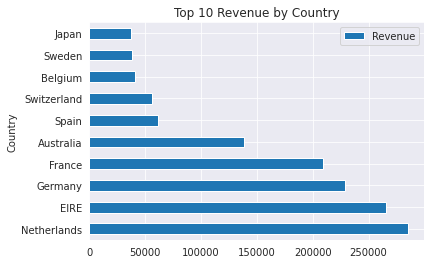

In [ ]:
# showing it using a bar Chart

sns.set_style("darkgrid")

rev.plot(kind = 'barh')
plt.title('Top 10 Revenue by Country')
;

### Top 10 Countries by Units sold (excluding UK)

In [ ]:
# Creating a dataframe to show countries and Units sold alone

u = ['Country', 'Quantity']
u = r[u].copy()
u

,Country,Quantity
26,France,24
27,France,24
28,France,12
29,France,12
30,France,24
...,...,...
541904,France,12
541905,France,6
541906,France,4
541907,France,4


In [ ]:
# To show units sold per Country

unit = u.groupby(u.Country).sum().sort_values('Quantity', ascending=False).head(10)
unit

,Quantity
Country,
Netherlands,200361
EIRE,140133
Germany,119154
France,111428
Australia,83891
Sweden,36078
Switzerland,30082
Spain,27933
Japan,26016


''

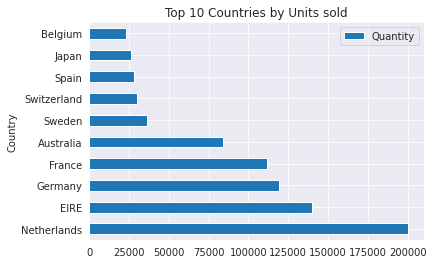

In [ ]:
# showing it using a bar Chart

unit.plot(kind = 'barh')
plt.title('Top 10 Countries by Units sold')
;

### Top 10 Customers by Revenue

In [ ]:
# Creating a dataframe to show Customers and their Revenue alone

c = ['CustomerID', 'Revenue']
c = r[c].copy()
c

,CustomerID,Revenue
26,12583,90.00
27,12583,90.00
28,12583,45.00
29,12583,10.20
30,12583,15.60
...,...,...
541904,12680,10.20
541905,12680,12.60
541906,12680,16.60
541907,12680,16.60


In [ ]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43248 entries, 26 to 541908
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  43248 non-null  object 
 1   Revenue     43248 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
# To show units sold per Country

cust = c.groupby(c.CustomerID).sum().sort_values('Revenue', ascending=False).head(10)
cust

,Revenue
CustomerID,
14646,280206.02
14911,143711.17
12415,124914.53
14156,117210.08
17404,31906.82
12753,21429.39
12744,21279.29
12471,19788.65
12731,18895.91


''

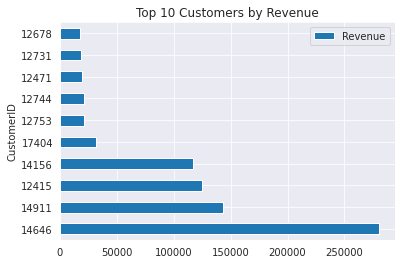

In [ ]:
# showing it using a bar Chart

cust.plot(kind = 'barh')
plt.title('Top 10 Customers by Revenue')
;

Saving as CSV before download

In [ ]:
# Converting to CSV

r.to_csv('Online Retail data.csv', index = False)

In [ ]:
# Importing library to allow download of files

from google.colab import files

files.download('Online Retail data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>